# **Task** #5 **To** **explore** **Bussiness** **Analytics**

**Task** :
       To perform '**Exploratory** **data** **analysis** ' on the provided dataset '**Sample** **store** ' and to find out the weak areas where you can work to make more profit.


In [1]:
import numpy as np  # array operations
import pandas as pd  #data analysis
import matplotlib.pyplot as plt #visualization 
import seaborn as sns # visualization  
#from sklearn.preprocessing import StandardScaler



**Importing** **dataset**

In [2]:
url='https://github.com/thivyalakshmi/task-5-Exploratory-analysis-/blob/main/SampleSuperstore.csv?raw=true'
data=pd.read_csv(url)
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Inspecting rows and columns**

In [3]:
data.shape

(9994, 13)

**Displaying** **the** **column** **names** **of** **the** **dataset**

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

**Obtaining** **the** **statistical** **information** **from** **the** **data**

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Checking** **for** **null** **values**

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Inspecting** **for** **duplicate** **values**

In [ ]:
data.duplicated().sum()

17

So we find 17  duplicate values in the dataset ,hence attempting to remove the duplicate values from the dataset.

In [ ]:
data.drop_duplicates(inplace=True)
data.shape #checking for elimination of duplicate values

(9977, 13)

**Correlating** **dataset**

In [ ]:
corr_data=data.corr()
corr_data

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


**Visualizing** **correlated** **data** **via** **a** **heat** **map**

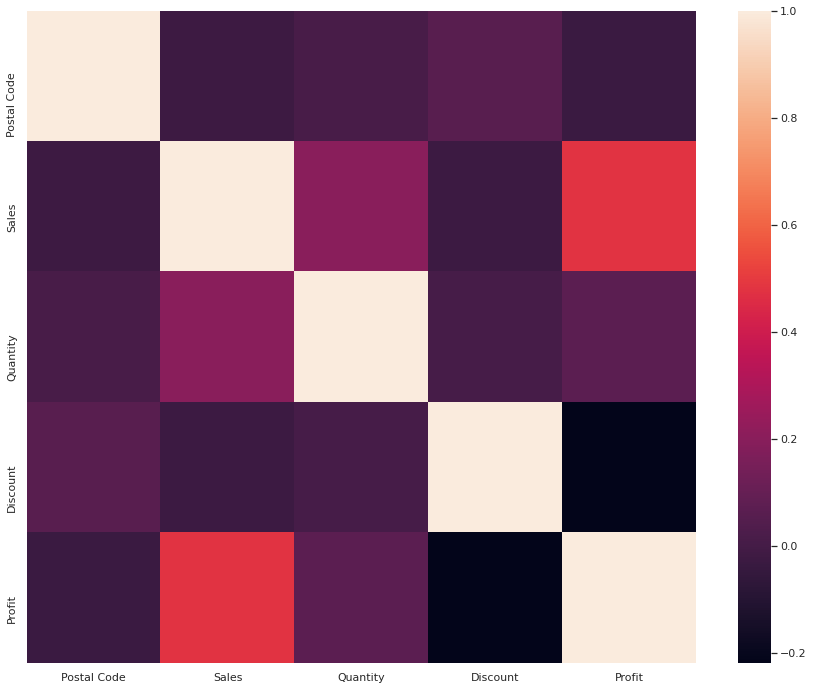

In [ ]:
sns.set()
plt.figure(figsize=(15,12))
sns.heatmap(data.corr())

**Pair** **plot** **of** **data**

 pairplot produces a matrix of relationships between each variable in the data for an instance examination of our data.

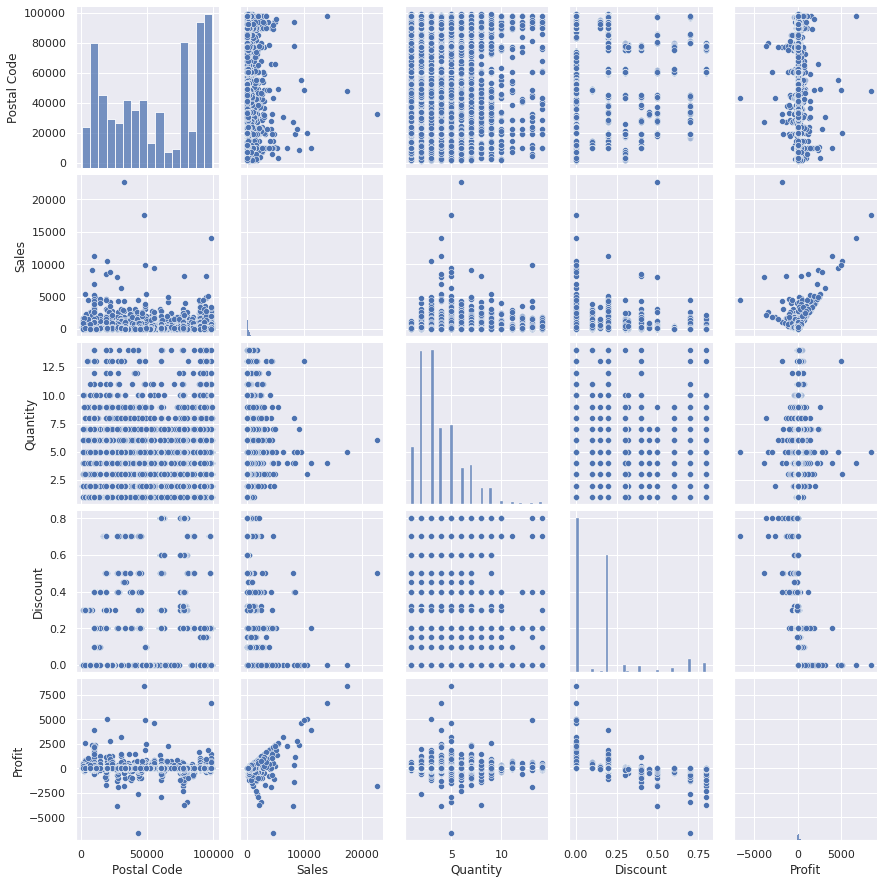

In [ ]:
sns.pairplot(data)

**Pre**-**processing** **pipeline** 

In [ ]:
Data=data.select_dtypes(include=[np.number ])

**Checking** **for** **outliers** 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


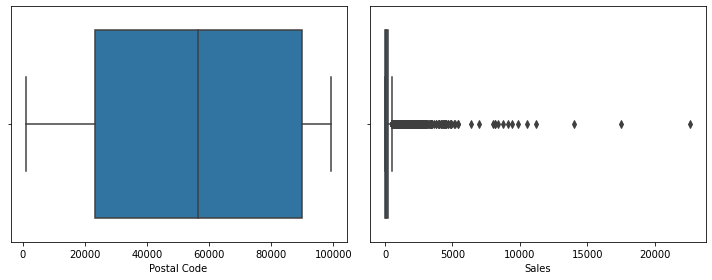

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


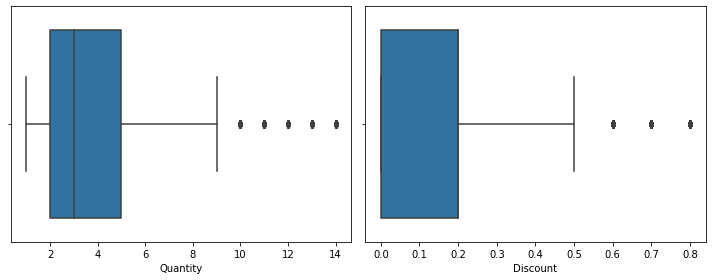

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


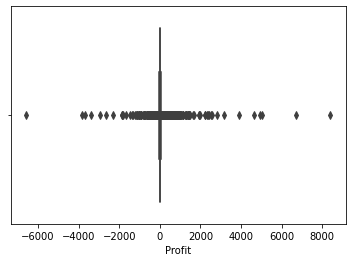

In [ ]:
column = Data.columns.to_list()
for col in range(0,len(column),2):
  if len(column)>col +1:
    plt .figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(Data[column[col]])
    plt.subplot(122)
    sns.boxplot(Data[column[col+1]])
    plt.tight_layout()
    plt.show()
  else:
      sns.boxplot(Data[column[col]])

**Removing** **outliers** **for** **better** **analysis**

In [ ]:
from scipy.stats.mstats import winsorize
column=list(Data)
for col in column:
  if col in Data.select_dtypes(include=np.number).columns :
    Data[col]=winsorize(Data[col],limits=[0.05,0.1],inclusive=(True,True))
    Data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


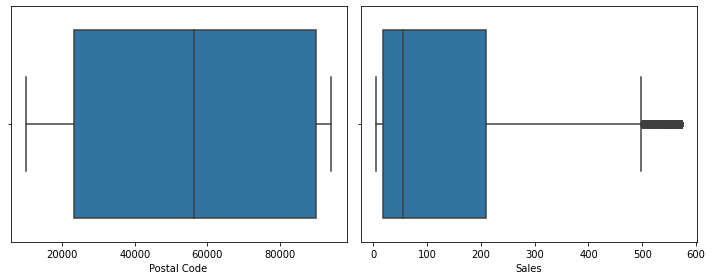

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


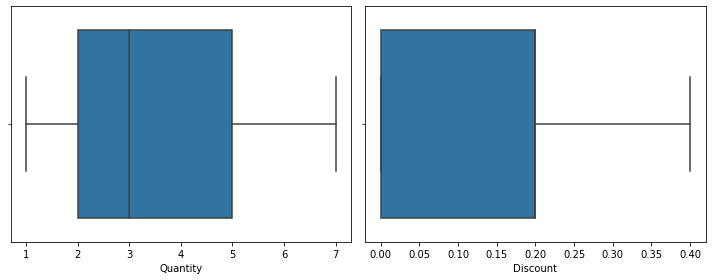

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


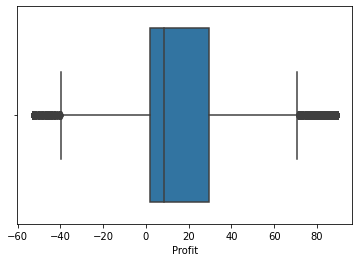

In [ ]:
column = Data.columns.to_list()
for col in range(0,len(column),2):
  if len(column)>col +1:
    plt .figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(Data[column[col]])
    plt.subplot(122)
    sns.boxplot(Data[column[col+1]])
    plt.tight_layout()
    plt.show()
  else:
      sns.boxplot(Data[column[col]])

In [ ]:
Data.shape

(9994, 5)

In [ ]:
Data.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.960,2,0.0,41.9136
1,42420,572.760,3,0.0,89.3070
2,90036,14.620,2,0.0,6.8714
3,33311,572.760,5,0.4,-53.0720
4,33311,22.368,2,0.2,2.5164


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  9994 non-null   int64  
 1   Sales        9994 non-null   float64
 2   Quantity     9994 non-null   int64  
 3   Discount     9994 non-null   float64
 4   Profit       9994 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 390.5 KB


In [ ]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55162.858215,148.377948,3.633480,0.128171,17.426367
std,31371.130555,186.353917,1.841906,0.137760,35.023306
min,10009.000000,4.980000,1.000000,0.000000,-53.072000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,94122.000000,572.760000,7.000000,0.400000,89.307000


**Visualization** **of** **data**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


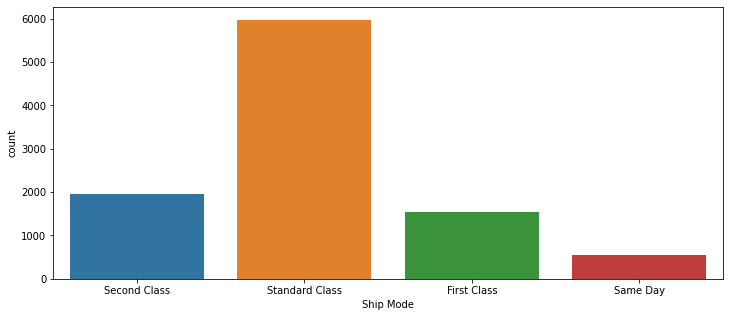

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


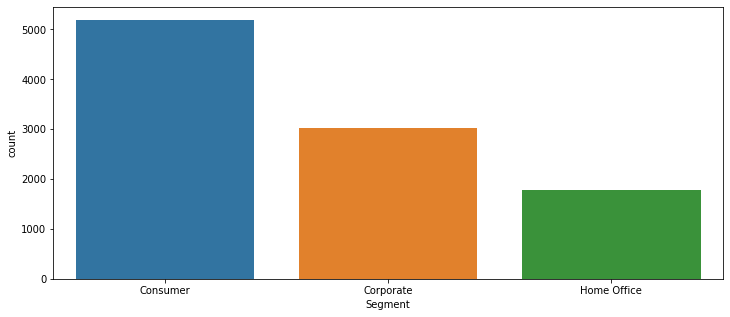

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


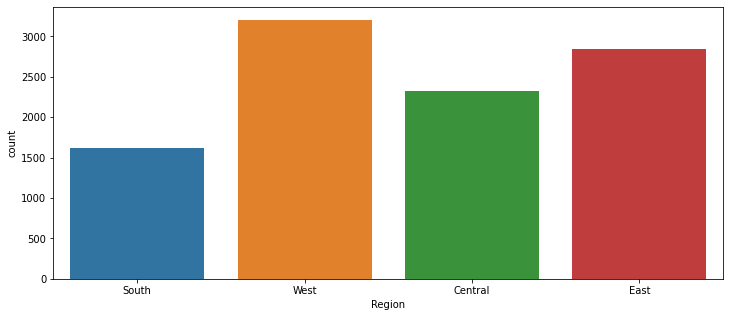

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


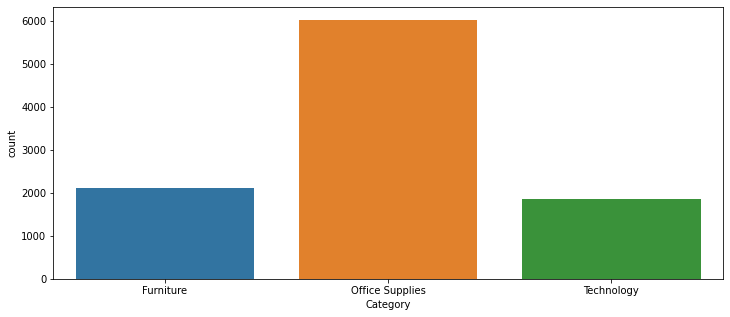

In [ ]:
for i in data[['Ship Mode','Segment','Region','Category']]:
  plt.figure(figsize=(12,5))
  sns.countplot(data[i])
  plt.show()

**Observation**:
     
     From the above plots we infer the sections which shows higher rate of profit 
   

Visualizing the frequency of subcategory products

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

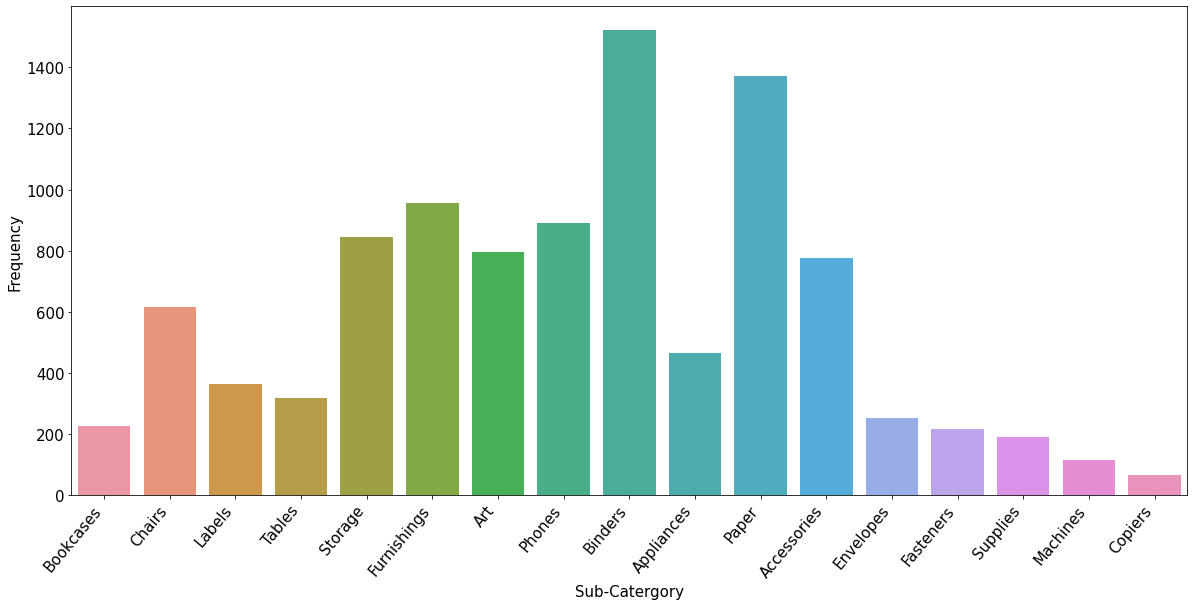

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=50, ha ='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Catergory',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

**Observation**:

 From the plot we observe the frequencies of the items.

**Profitable** **products**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

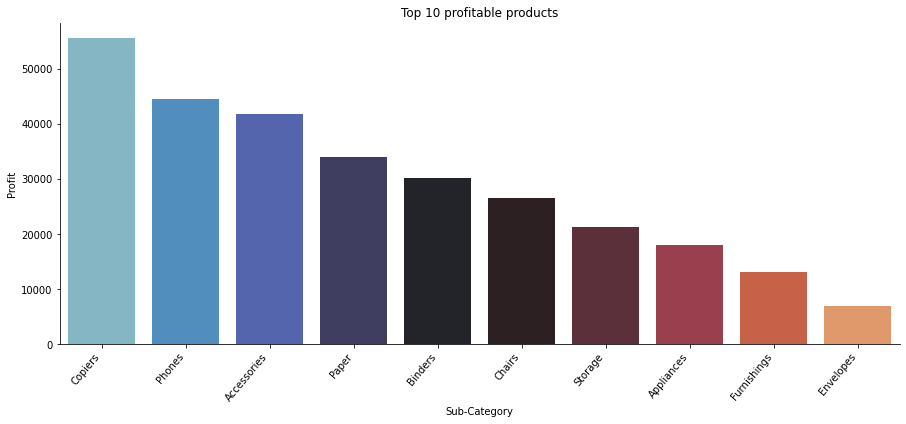

In [7]:
top_10=data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
sns.catplot(x='Sub-Category',y='Profit',data=top_10.head(10),kind='bar',aspect=2.5,palette='icefire')
plt.title('Top 10 profitable products')
plt.xticks(rotation=50,ha='right')



**Observations**:  

Form the above graph it is evident that copiers , phones and accessories are profitable areas

 **Region** **wise** **sub**-**category** **of** **selling** **products**

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

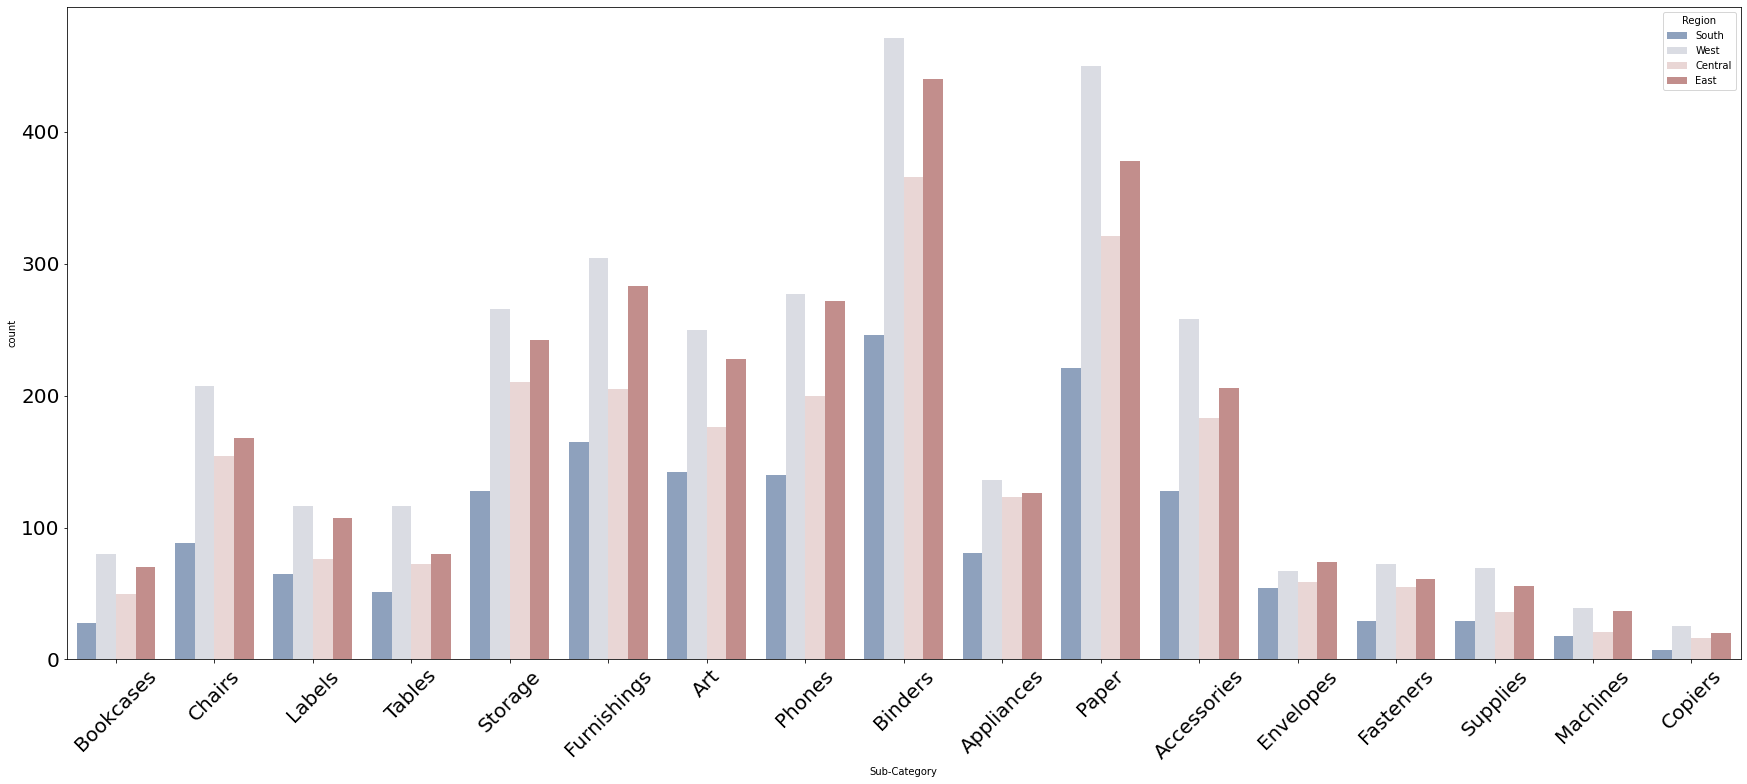

In [9]:
plt.figure(figsize=(30,12))
sns.countplot(x='Sub-Category',hue='Region',data=data,palette='vlag')
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)

**Observation**: 
 
  From the above plot we observe that the profits in west region are higher in most of the  cases

**City** **wise** **profit** **analysis**

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

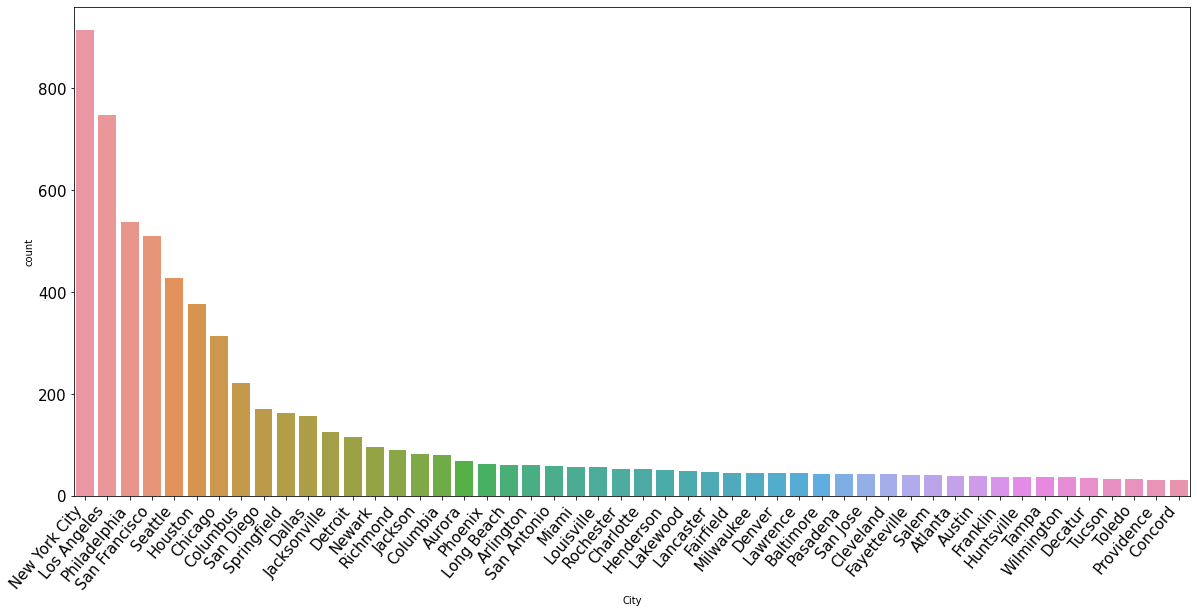

In [21]:
plt.figure(figsize=(20,9))
sns.countplot(x=data['City'],order=(data['City'].value_counts().head(50).index))
plt.xticks(rotation=50,ha='right',fontsize=15)
plt.yticks(fontsize=15)

**Obervation**: 

  From the above graph we can infer that cities such as New York , Los angeles , Philadelphia and San Francisco are profitable cities.

**Vizualzing data using a pie-chart**

Text(0.5, 1.0, 'Region wise product sale')

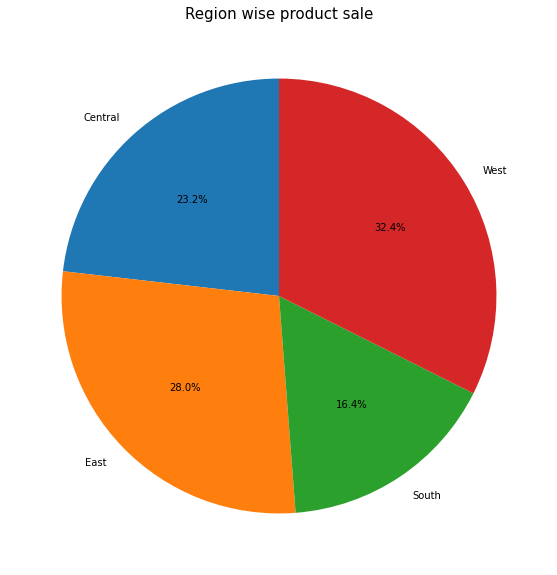

In [30]:
df_region=data.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,10))
plt.pie(df_region['Quantity'],labels=df_region['Region'].unique(),autopct='%1.1f%%',startangle=90)
plt.title('Region wise product sale',fontsize=15)


**Plot** **of** **categories** **to** **analyse** **the** **sale**

Text(0.5, 1.0, 'Categories of product sold')

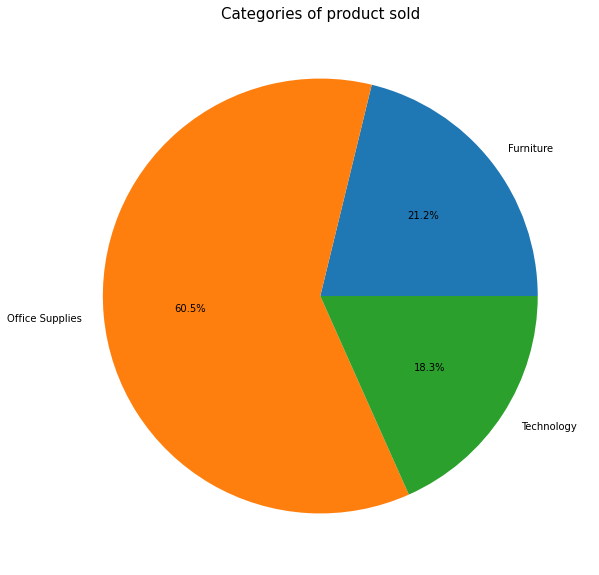

In [29]:
df_av=data.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,10))
plt.pie(x=df_av['Quantity'],labels=df_av['Category'].unique(),autopct='%1.1f%%')
plt.title('Categories of product sold',fontsize=15)

**Subcategory** **of** **items** **ordered**

([<matplotlib.patches.Wedge at 0x7f6c5fd3f048>,
 [Text(0.9763276824947603, 0.5067388443709547, 'Binders'),
  Text(0.19978472989163298, 1.081705163943543, 'Paper'),
  Text(-0.5738784222686997, 0.9384367620966201, 'Furnishings'),
  Text(-0.9944482652289589, 0.470183631981287, 'Phones'),
  Text(-1.0940868088550497, -0.11390370797025917, 'Storage'),
  Text(-0.8953340580942692, -0.6390437578260567, 'Art'),
  Text(-0.4854447900078828, -0.9870883222154959, 'Accessories'),
  Text(-0.021437193482498344, -1.0997910923150787, 'Chairs'),
  Text(0.34701412694296424, -1.0438300607388218, 'Appliances'),
  Text(0.6045347489929012, -0.9189873433622958, 'Labels'),
  Text(0.786448767511178, -0.7690892900568498, 'Tables'),
  Text(0.9115071047427434, -0.6157554693248787, 'Envelopes'),
  Text(0.9940044193351475, -0.4711212310458919, 'Bookcases'),
  Text(1.0499830321338506, -0.3279262603558997, 'Fasteners'),
  Text(1.0832417906883753, -0.1912778683126777, 'Supplies'),
  Text(1.0965777941706178, -0.0867014494

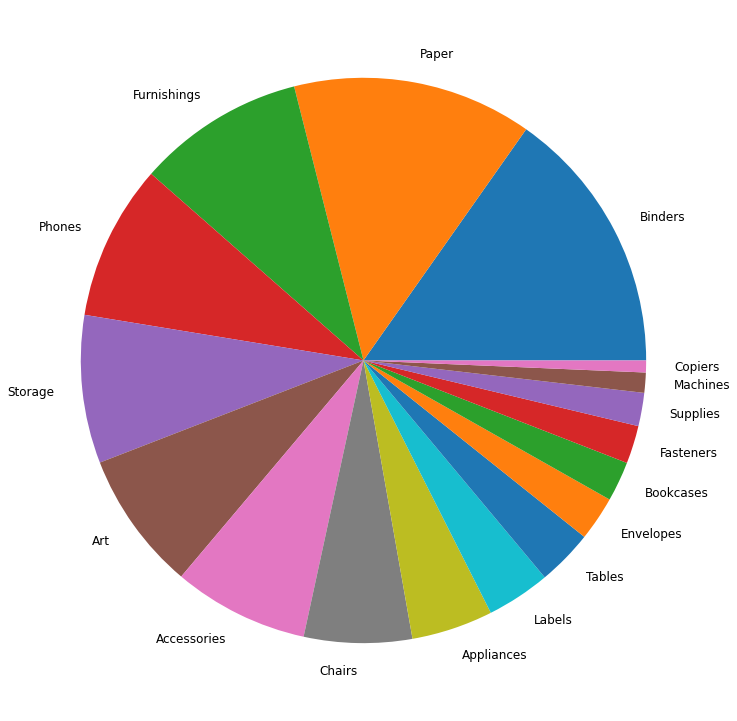

In [34]:
plt.figure(figsize=(13,13))
plt.pie(x=data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index,textprops={'fontsize':12})

**Conclusion** 
 
 Hence from the above visualizations we infer west region offers more profit and also we can analyse the items which earn profit